In [146]:
ls

anyToys.py             functions.py          __pycache__/
anyToysSym.py          GeneralPDFSymfit.py   Signals_Symfit.py
Backgrounds_Symfit.py  machinery.py          ToysData.py
completeSymfit.py      modelsSymfit.py       toysParams.json
DataSelection/         modelsZfit.py         XGB/
Efficiency/            plotting.py           zfit2 graficas del parametro.ipynb
Experiments_Fitting/   proyectionsSymfit.py  zVSs.ipynb


In [10]:
import GeneralPDFSymfit as GenPDF
import Signals_Symfit as Signals

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
import zfit

import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import symfit
import sympy
plt.style.use(hep.styles.CMS)

In [78]:
x_np = np.linspace(5, 5.11, 1000)

In [74]:
1/0.194770105946698

5.134258130319374

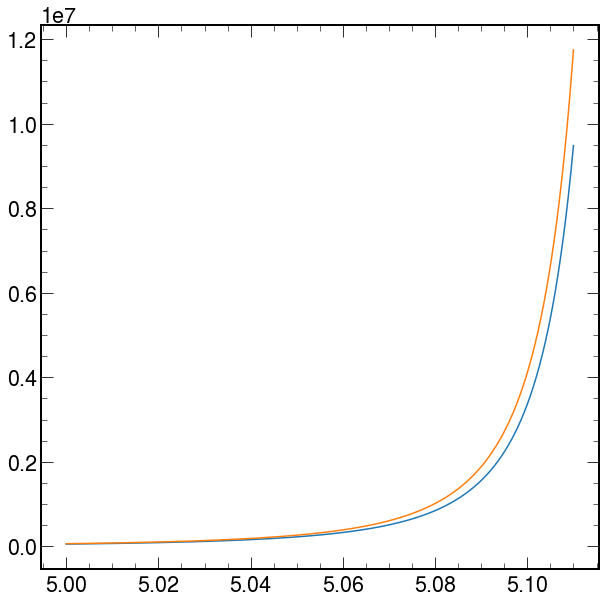

In [85]:
plt.plot(x_np, (1-0.194770105946698*x_np)**-3)
plt.plot(x_np, (1-0.194770105946698*x_np)**-3.04)

symfit.sympify?

In [ ]:
                'muCB':5.280500506948775,
                'alphaCB':-5.3022425168550456,
                'sigmaCB':0.03092999416324259,
                'nCB':3.0438535136416878,
                'muGauss':5.27849485156445,
                'sigmaGauss1': 0.05835146361679967,
                'sigmaGauss2':0.10102419078624053,
                'fracCB' : 0.49641896946768643,
                'fracGauss1': 0.35188002124745454,
                'fracGauss2':0.1199130312811354

In [2]:
from importlib import reload

In [3]:
x = symfit.Variable('x')

In [77]:
sympy.simplify(((32.3310762595748*x-170.724264578884>-5.30224251685505)))

x > 5.11650217685034

In [29]:
sympy.simplify(((x-5.278)/0.0309)>-5.302)

x > 5.1141682

In [42]:
1/((3.04385351*0.0309/(5.3022)) + 5.28050 - 5.3022)

-252.4536581890343

In [59]:
sympy.simplify(32.3310762595748*x-170.724264578884>5.30224251685505)

x > 5.44449883704719

In [145]:
GenPDF = reload(GenPDF)

issues = GenPDF.crystal_ball(x, mu = 5.280500506948775, 
                             sigma = 0.03092999416324259,
                             alpha= 5.3022425168550456,
                             n = 3.0438535136416878 )


In [140]:
issues

Piecewise((16.1655381297874*sqrt(2)*exp(-14573.3872580004*(0.189375987879192*x - 1)**2)/sqrt(pi), 32.3310762595748*x - 170.724264578884 > -5.30224251685505), (2.53419895950342e-14*(1 - 0.194770105946698*x)**(-3.04385351364169), True))/(6.82441461928398e-9 + 0.0154649970816213*sqrt(2)*sqrt(pi)*(erf(2.65112125842752*sqrt(2)) + 1))

In [141]:
symfit.simplify(32.3310762595748*x-170.724264578884>5.30224251685505)

x > 5.44449883704719

In [142]:
symfit.simplify(32.3310762595748*x-170.724264578884>-5.30224251685505)

x > 5.11650217685034

In [143]:
1/0.19477010

5.1342582870779445

<string>:2: RuntimeWarning: invalid value encountered in power


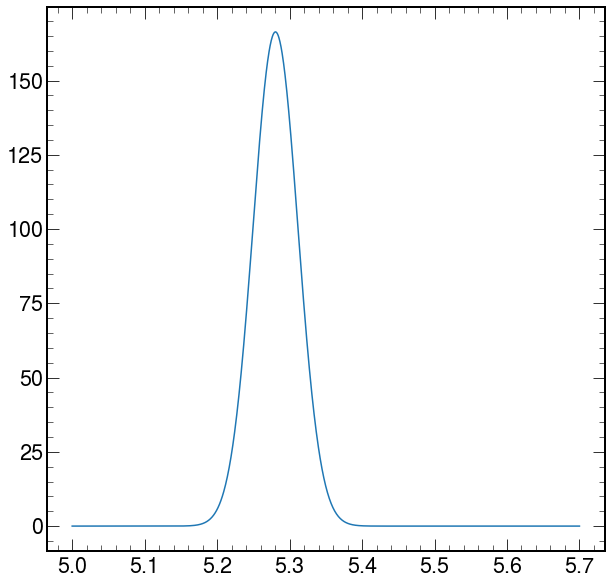

In [144]:
m = np.linspace(5, 5.7, 1400)
plt.plot(m, issues(m))

In [5]:
GenPDF = reload(GenPDF)
CB_v0 = GenPDF.crystal_ball(x, mu = 0, sigma = 3, alpha= 4, n = 5 )
CB_v1 = GenPDF.crystal_ball(x, mu = 0, sigma = 3, alpha= 4, n = 5, limits = [-1,1] )
CB_v2 = GenPDF.crystal_ball(x, mu = 0, sigma = 3, alpha= 4, n = 5, norm=False )


In [6]:
CB_v0

Piecewise((exp(-x**2/18), x/3 > -4), (3125*exp(-8)/(1024*(-x/3 - 11/4)**5), True))/(15*exp(-8)/16 + 3*sqrt(2)*sqrt(pi)*(erf(2*sqrt(2)) + 1)/2)

In [7]:
CB_v1

sqrt(2)*Piecewise((exp(-x**2/18), x/3 > -4), (3125*exp(-8)/(1024*(-x/3 - 11/4)**5), True))/(6*sqrt(pi)*erf(sqrt(2)/6))

In [8]:
CB_v2

Piecewise((exp(-x**2/18), x/3 > -4), (3125*exp(-8)/(1024*(-x/3 - 11/4)**5), True))

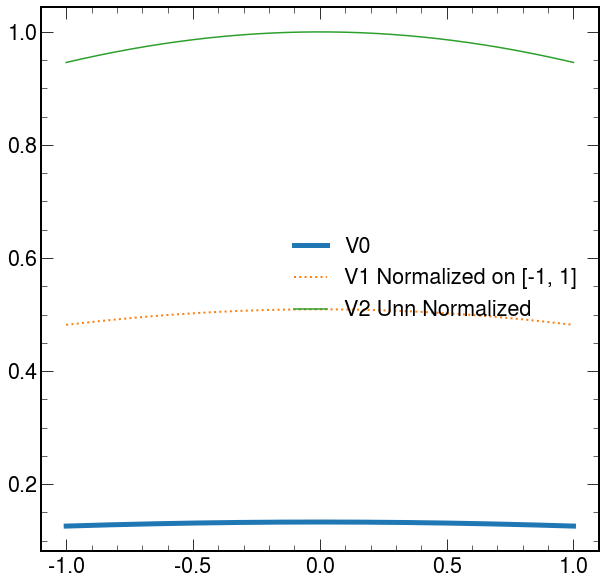

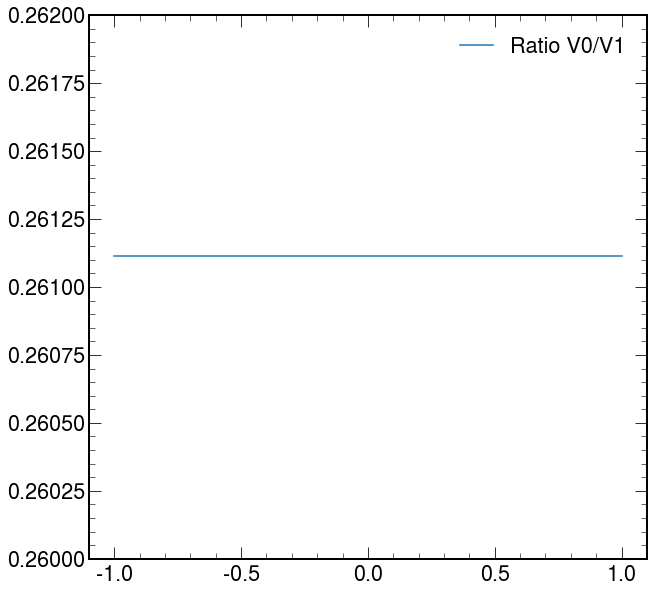

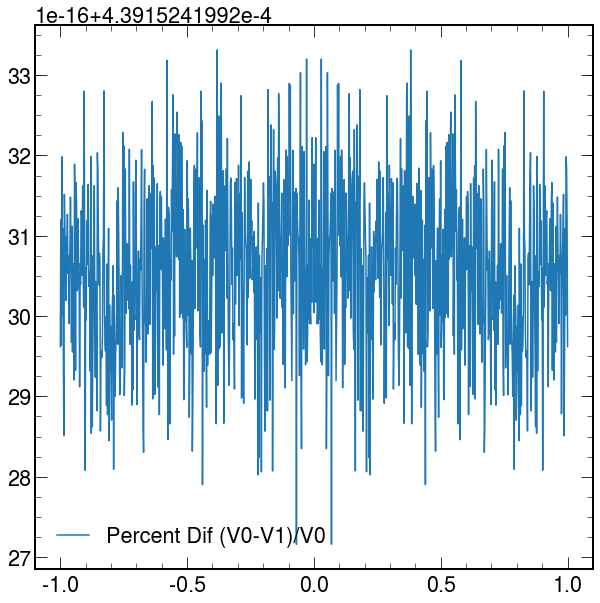

In [17]:
x_ = np.linspace(-1,1, 1000)
RATIO = 0.261

plt.plot(x_, CB_v0(x_), label='V0', linewidth=5)
plt.plot(x_, CB_v1(x_), label= 'V1 Normalized on [-1, 1]', ls=':', linewidth=2)
plt.plot(x_, CB_v2(x_), label= 'V2 Unn Normalized')
plt.legend(loc=7)
plt.show()

plt.plot(x_, CB_v0(x_)/(CB_v1(x_)), label='Ratio V0/V1')
plt.legend()
if RATIO!=1:
    epsilon = 10 ** -int(len(str(RATIO).split('.')[1]))
    plt.ylim(RATIO-epsilon, RATIO+epsilon)
plt.show()

plt.plot(x_, (CB_v0(x_) - (CB_v1(x_))*RATIO)/CB_v0(x_), label='Percent Dif (V0-V1)/V0')
plt.legend()
plt.show()

In [64]:
## WIKIPEDIA CRYSTALL BALLS
## https://en.wikipedia.org/wiki/Crystal_Ball_function

In [43]:
_1 = GenPDF.crystal_ball(x, mu = 0, sigma = 1, alpha= 10, n = 1, limits=[-10,4] )
_2 = GenPDF.crystal_ball(x, mu = 0, sigma = 1, alpha= 1, n = 3 , limits=[-10,4])
_3 = GenPDF.crystal_ball(x, mu = 0, sigma = 1, alpha= 1, n = 1, limits=[-10,4])

/home/horacio/Documents/pycms/lib64/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


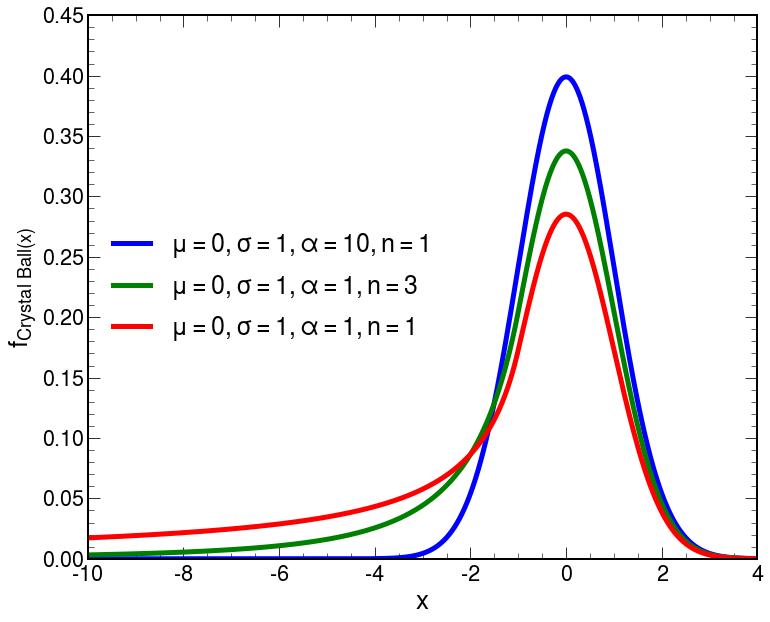

In [44]:
_x_ = np.linspace(-10,4, 4000)

plt.figure(figsize=(12,10))
plt.plot(_x_, _1(_x_), color='blue', label=r'$\mu = 0, \sigma = 1, \alpha= 10, n = 1$', linewidth=5)
plt.plot(_x_, _2(_x_), color='green', label = r'$\mu = 0, \sigma = 1, \alpha= 1, n = 3$', linewidth=5)
plt.plot(_x_, _3(_x_), color='red', label = r'$\mu = 0, \sigma = 1, \alpha= 1, n = 1$', linewidth=5)
plt.xlim(-10,4)
plt.ylim(0, 0.45)

plt.xlabel('$x$')
plt.ylabel('$f_{Crystal\  Ball (x)}$')

plt.legend(fontsize=25, loc=6)

In [46]:
symfit.PolynomialDivisionFailed

sympy.polys.polyerrors.PolynomialDivisionFailed

In [49]:
GenPDF = reload(GenPDF)
_3 = GenPDF.crystal_ball(x, mu = 4, sigma = 1.8, alpha= 1, n = 3, limits=[-10,4])

couldn't reduce degree in a polynomial division algorithm when dividing [1.01643953670516e-20*(exp(1/2))**3*_t**2 + 1.55682465591408e-5*(exp(1/2))**2*_t, -2.03287907341032e-20*(exp(1/2))**3*_t**2 - 0.00011831867384947*(exp(1/2))**2*_t] by [-4.74087686234656e-37*(exp(1/2))**5*_t**3 + 5.81137247244241e-21*(exp(1/2))**3*_t + 5.18941551971362e-6*(exp(1/2))**2]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[exp(1/2),_t]. Zero detection is guaranteed in this coefficient domain. This may indicate a bug in SymPy or the domain is user defined and doesn't implement zero detection properly.
falling back to numeric integration


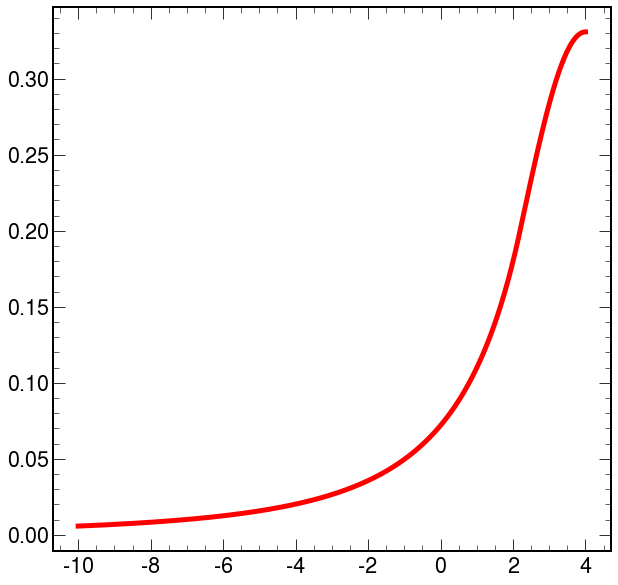

In [50]:
plt.plot(_x_, _3(_x_), color='red', linewidth=5)


In [27]:
_3

Piecewise((exp(-(x - 4)**2/2), x - 4 > -1), (27*exp(-1/2)/(6 - x)**3, True))/(sqrt(2)*sqrt(pi)*erf(sqrt(2)/2)/2 + 741*exp(-1/2)/512)

In [107]:
(5.27**2)/(2*(0.05)**2)

5554.579999999998

In [108]:
(105.4-1)/20

5.220000000000001

In [6]:
GenPDF = reload(GenPDF)
m = symfit.Variable('m')
_2 = Signals.CrystalBall_2Gauss(m, muCB=5.27,  alphaCB=2,  sigmaCB=0.04,     nCB=3,   muGauss=5.27,     
                                sigmaGauss1= 0.10,  sigmaGauss2=0.03, fracCB = 0.05 ,  fracGauss1=0.25,   fracGauss2=0.25,
                               limits=[5,5.7])

couldn't reduce degree in a polynomial division algorithm when dividing [EX(0.00691070078825181*exp(2)), EX(-0.108843537414966*exp(2)), EX(0.571428571428571*exp(2)), EX(-1.0*exp(2))] by [EX(1)]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is EX. You may want to use a different simplification algorithm. Note that in general it's not possible to guarantee to detect zero in this domain.
falling back to numeric integration
9.822190350497253


In [14]:
tot = 0.05+0.25+0.25

In [18]:
m_=np.linspace(5, 5.7, 2800)

In [10]:
mass = zfit.Space('mass', limits=[5, 5.7])

In [13]:
g1 = zfit.pdf.Gauss(5.27, 0.10, mass)
g2 = zfit.pdf.Gauss(5.27, 0.03, mass)
cb = zfit.pdf.CrystalBall(5.27, 0.04, 2, 3 , mass)

In [16]:
suma = zfit.pdf.SumPDF(pdfs=[cb, g1, g2], fracs=[0.05/tot, 0.25/tot])

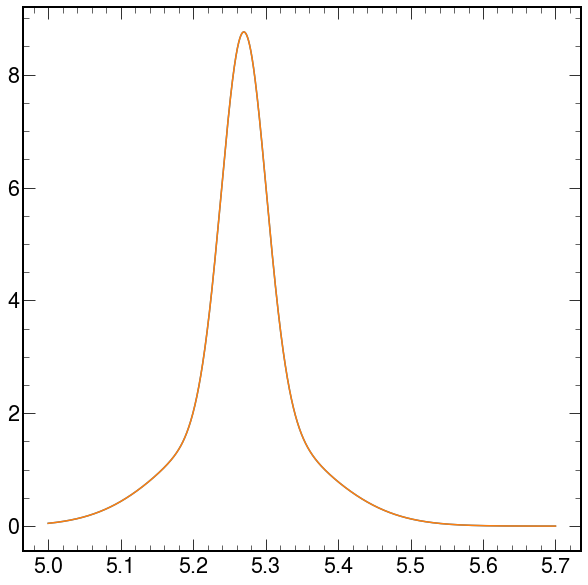

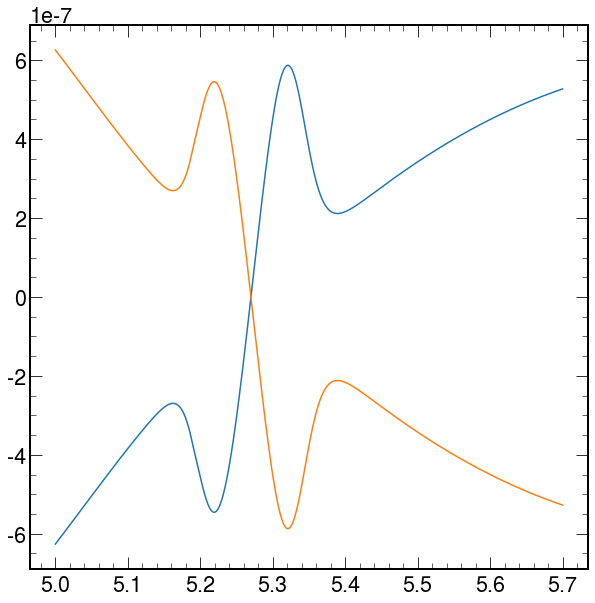

In [30]:
plt.plot(m_, _2(m_))
plt.plot(m_, suma.pdf(m_))
plt.show()



plt.plot(m_, (_2(m_)-suma.pdf(m_))/_2(m_))

plt.plot(m_, (-_2(m_)+suma.pdf(m_))/suma.pdf(m_))

